<a href="https://colab.research.google.com/github/MihleSenene/MihleSenene/blob/main/Feature_Relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the path to your CSV file
csv_file_path = '/content/drive/My Drive/HI-Medium_Trans.csv'

# Read a random subset of the CSV file
n = 149000  # Number of random rows you want to sample

# Read the CSV file in chunks and then sample
chunk_size = 1000000  # Define the size of each chunk
chunks = pd.read_csv(csv_file_path, chunksize=chunk_size)

# Initialize an empty list to store chunks
chunk_list = []

for chunk in chunks:
    chunk_list.append(chunk)

# Combine all chunks into a single DataFrame
df = pd.concat(chunk_list)

# Randomly sample n rows from the DataFrame
df_sample = df.sample(n=n, random_state=1)  # Set random_state for reproducibility

# Display the first few rows of the sample
print(df_sample.head())


                 Timestamp  From Bank    Account  To Bank  Account.1  \
26274556  2022/09/14 15:07     295233  822DDFF30   105876  826D2CD50   
4686524   2022/09/02 01:00     212332  805BF5AE0   212332  805BF5AE0   
3709398   2022/09/01 18:12         70  100428780       25  818A54550   
25670473  2022/09/14 07:37     115813  810FB69A0  1121126  838A97C80   
18110058  2022/09/09 11:18     113196  806C0BAB0    25935  80A40E700   

          Amount Received Receiving Currency  Amount Paid Payment Currency  \
26274556          3027.67           UK Pound      3027.67         UK Pound   
4686524            328.26               Euro       384.65        US Dollar   
3709398         112289.53              Rupee    112289.53            Rupee   
25670473           242.91          US Dollar       242.91        US Dollar   
18110058           320.09          US Dollar       320.09        US Dollar   

         Payment Format  Is Laundering  
26274556            ACH              0  
4686524         

In [6]:
# Select only numeric columns
numeric_cols = df_sample.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling or Z-Score Standardization
scaler = MinMaxScaler()  # or StandardScaler() for Z-Score

df_sample[numeric_cols] = scaler.fit_transform(df_sample[numeric_cols])

# Display the normalized dataframe
print(df_sample.head())


                 Timestamp  From Bank    Account   To Bank  Account.1  \
26274556  2022/09/14 15:07   0.091533  822DDFF30  0.032853  826D2CD50   
4686524   2022/09/02 01:00   0.065831  805BF5AE0  0.065886  805BF5AE0   
3709398   2022/09/01 18:12   0.000022  100428780  0.000008  818A54550   
25670473  2022/09/14 07:37   0.035906  810FB69A0  0.347882  838A97C80   
18110058  2022/09/09 11:18   0.035095  806C0BAB0  0.008048  80A40E700   

          Amount Received Receiving Currency   Amount Paid Payment Currency  \
26274556     3.667933e-08           UK Pound  3.667933e-08         UK Pound   
4686524      3.976773e-09               Euro  4.659922e-09        US Dollar   
3709398      1.360355e-06              Rupee  1.360355e-06            Rupee   
25670473     2.942783e-09          US Dollar  2.942783e-09        US Dollar   
18110058     3.877796e-09          US Dollar  3.877796e-09        US Dollar   

         Payment Format  Is Laundering  
26274556            ACH            0.0  
4686

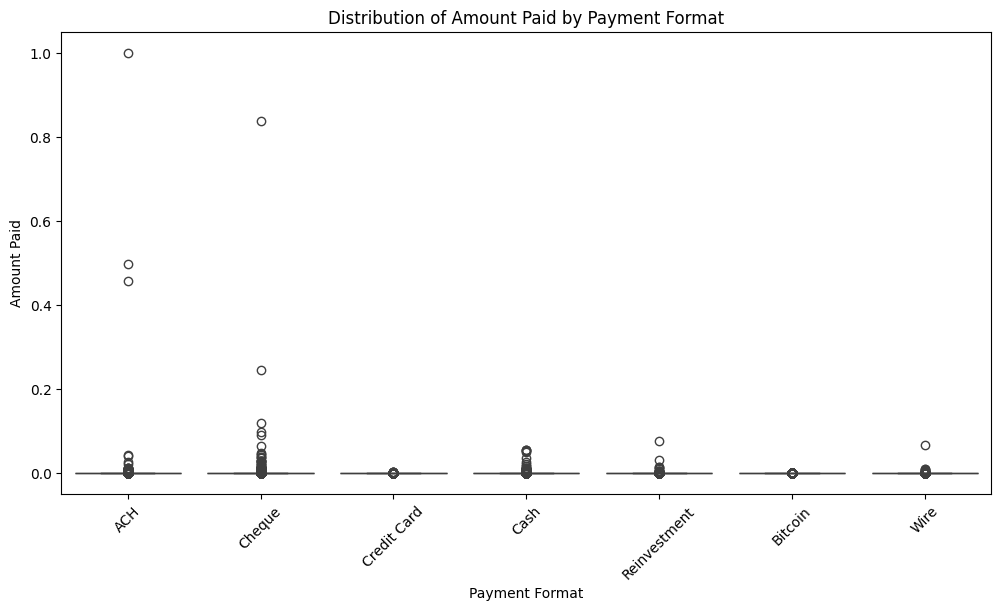

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Payment Format', y='Amount Paid', data=df_sample)
plt.title('Distribution of Amount Paid by Payment Format')
plt.xticks(rotation=45)
plt.show()

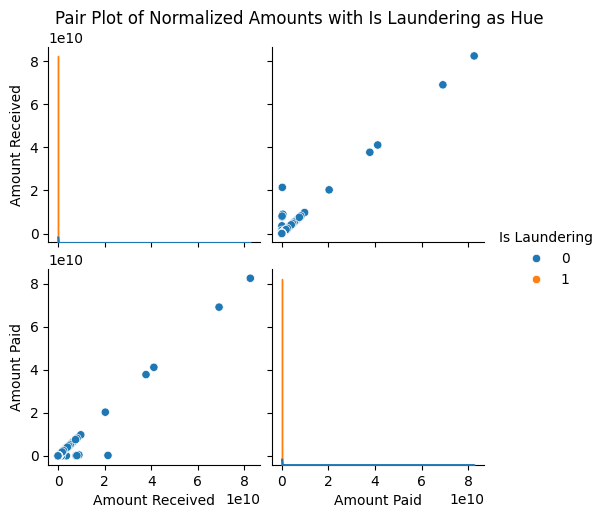

In [5]:
# Pair plot with normalized data
sns.pairplot(df_sample, hue='Is Laundering', vars=['Amount Received', 'Amount Paid'])
plt.suptitle('Pair Plot of Normalized Amounts with Is Laundering as Hue', y=1.02)
plt.show()


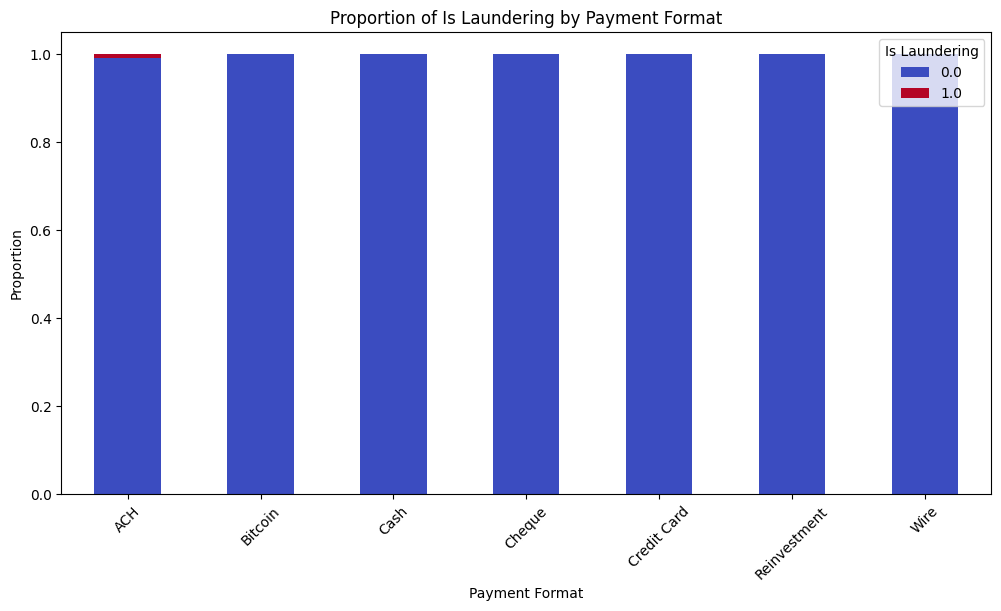

In [9]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_sample['Payment Format'], df_sample['Is Laundering'])

# Plot the stacked bar chart
cross_tab.div(cross_tab.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
plt.title('Proportion of Is Laundering by Payment Format')
plt.xlabel('Payment Format')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Is Laundering', loc='upper right')
plt.show()


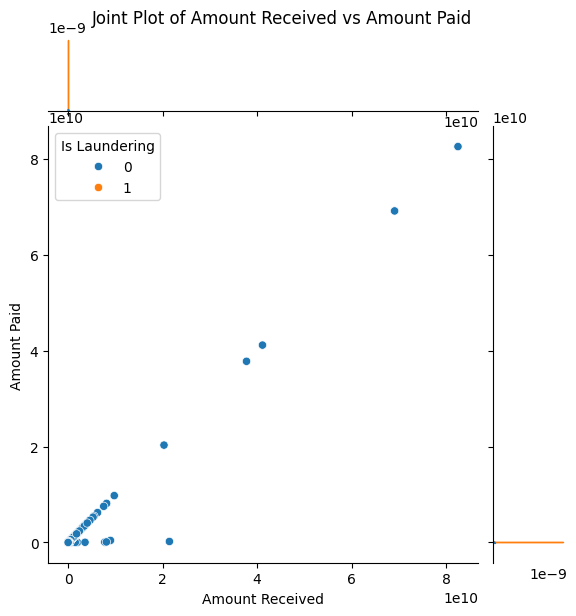

In [4]:
# Joint plot of Amount Received vs Amount Paid
sns.jointplot(x='Amount Received', y='Amount Paid', data=df_sample, kind='scatter', hue='Is Laundering')
plt.suptitle('Joint Plot of Amount Received vs Amount Paid', y=1.02)
plt.show()